In [ ]:
# installare (se necessario) e importare GeoPandas

In [ ]:
!pip install geopandas
import geopandas # installazione geopandas

In [ ]:
# caricare il geodataset delle piste ciclabili bike_ciclabili.zip

In [ ]:
from google.colab import drive
drive.mount('/content/drive') #importazione del drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
ciclabili = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/eserciziGeoPandas/Geopandas esercizio 5 RIVAVALENTINO F - Verifica_GeoPandas_C_senza_soluzioni.ipynb/bike_ciclabili')
ciclabili # creazione di un geodataframe prendendo i dati una cartella zippata nel drive

id_amat  ...                                           geometry
0        9001  ...  LINESTRING (9.18700 45.48095, 9.18696 45.48085...
1        9002  ...  LINESTRING (9.24192 45.43931, 9.24202 45.43939...
2        9003  ...  LINESTRING (9.23979 45.43996, 9.23991 45.43998...
3        9004  ...    LINESTRING (9.23902 45.44251, 9.23898 45.44256)
4        9005  ...  LINESTRING (9.23990 45.43999, 9.23985 45.44009...
...       ...  ...                                                ...
3160    12932  ...    LINESTRING (9.14977 45.46021, 9.14979 45.46024)
3161    12933  ...    LINESTRING (9.14966 45.46050, 9.14972 45.46057)
3162    12934  ...    LINESTRING (9.14963 45.46046, 9.14966 45.46050)
3163    12935  ...    LINESTRING (9.14957 45.46039, 9.14963 45.46046)
3164    12936  ...    LINESTRING (9.14954 45.46035, 9.14957 45.46039)

[3165 rows x 11 columns]

In [ ]:
# visualizzaere il geodataset delel piste ciclabili

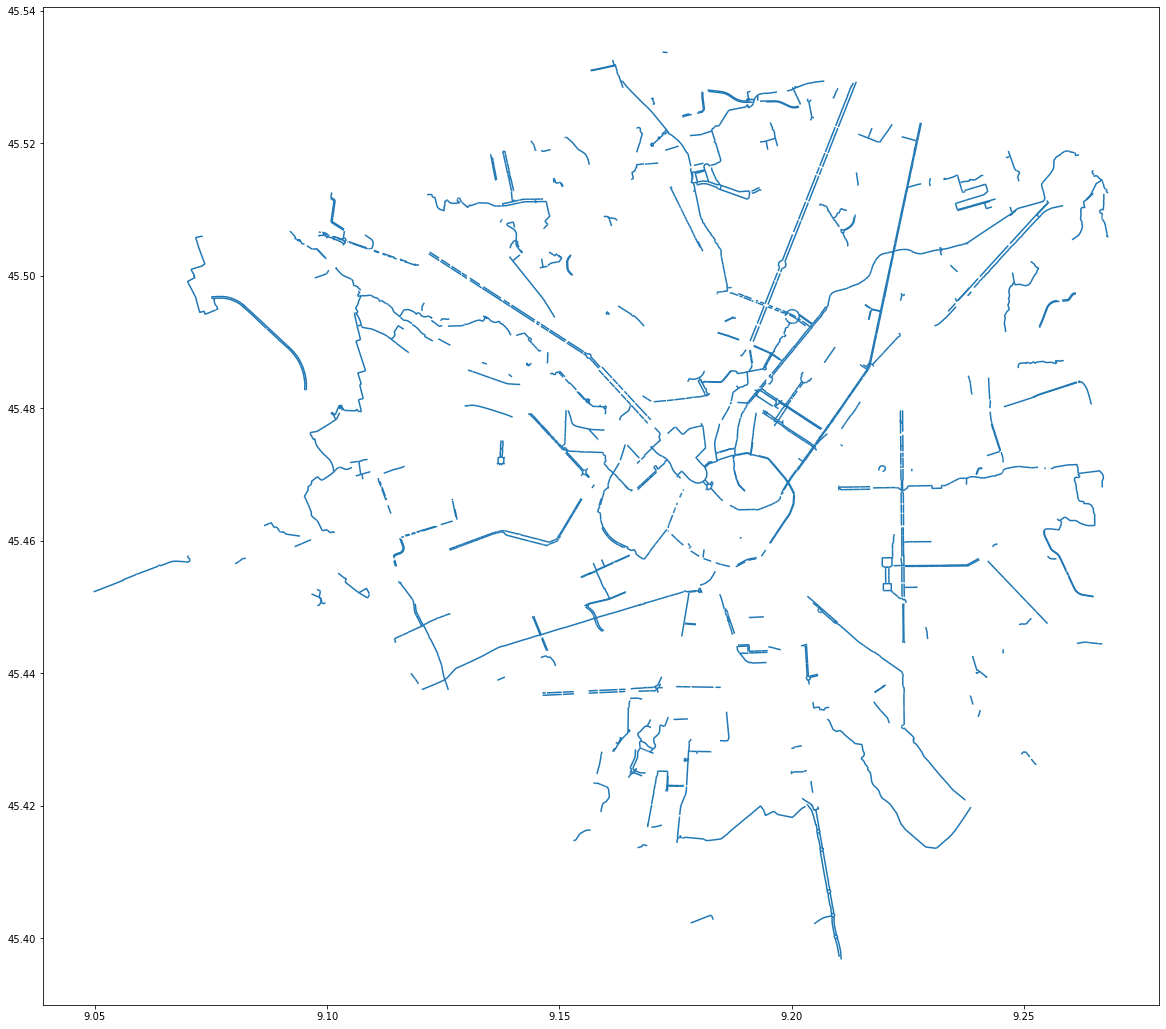

In [ ]:
ciclabili.plot(figsize=(20,20))

In [ ]:
# caricare il geodataset dei quartieri di Milano ds964_nil_wm.zip

In [ ]:
Qt_Milano = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/eserciziGeoPandas/Geopandas esercizio 5 RIVAVALENTINO F - Verifica_GeoPandas_C_senza_soluzioni.ipynb/ds964_nil_wm')
Qt_Milano # creazione di un geodataframe prendendo i dati una cartella zippata nel drive

ID_NIL  ...                                           geometry
0       48  ...  POLYGON ((9.15422 45.43775, 9.15419 45.43707, ...
1       64  ...  POLYGON ((9.10623 45.49016, 9.10295 45.48939, ...
2       67  ...  POLYGON ((9.15636 45.48785, 9.15724 45.48721, ...
3       81  ...  POLYGON ((9.16803 45.52234, 9.16687 45.52027, ...
4       84  ...  POLYGON ((9.20040 45.52848, 9.20055 45.52828, ...
..     ...  ...                                                ...
83      68  ...  POLYGON ((9.17174 45.47619, 9.17150 45.47595, ...
84       2  ...  POLYGON ((9.19165 45.46906, 9.19105 45.46843, ...
85      33  ...  POLYGON ((9.24044 45.44427, 9.24084 45.44424, ...
86      17  ...  POLYGON ((9.26729 45.51234, 9.26701 45.51241, ...
87      53  ...  POLYGON ((9.13575 45.44969, 9.13318 45.44886, ...

[88 rows x 9 columns]

In [ ]:
# installare (se necessario) e importare contextily e visualizzare la mappa di Milano con l'indicazione dei quartieri in nero (solo confini)
# e le piste ciclabili

In [ ]:
!pip install contextily
import contextily as ctx #importazione di contextily che permette di usare i dati sopra una mappa 

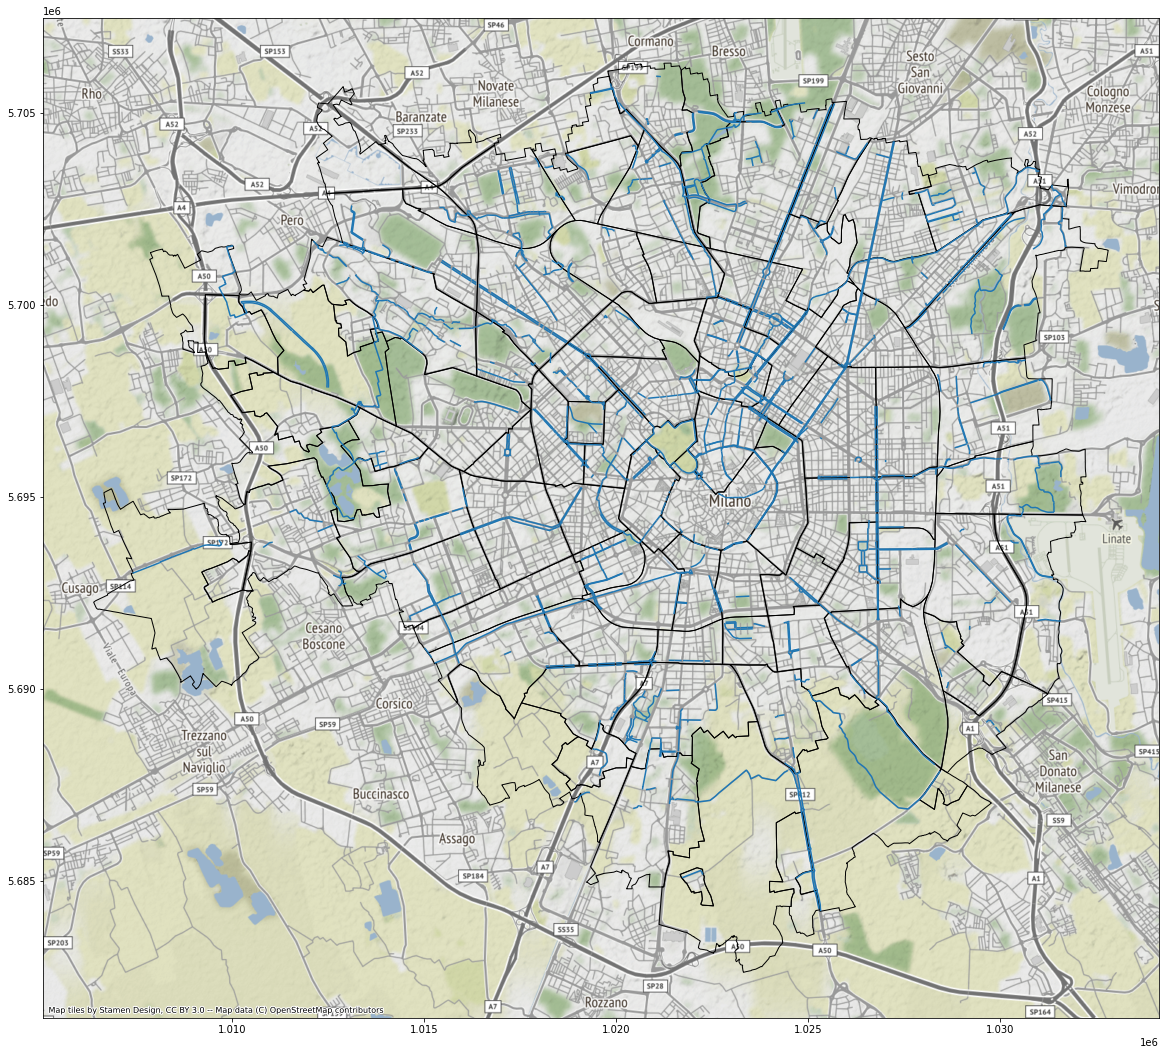

In [ ]:
ax=Qt_Milano.to_crs(epsg=3857).plot(facecolor='none',edgecolor='k',figsize=(20,20))
ciclabili.to_crs(epsg=3857).plot(ax=ax,facecolor='none')
ctx.add_basemap(ax) 
# vissualizzazione sulla mappa di milano i quartieri in nero e le ciclabili in blu

In [ ]:
# trovare il quartiere meno esteso
Qt_meno=Qt_Milano[Qt_Milano['Shape_Area']==Qt_Milano.Shape_Area.min()]
Qt_meno #cerca il quatiere piu piccolo

ID_NIL  ...                                           geometry
46      40  ...  POLYGON ((9.18364 45.40122, 9.18442 45.40004, ...

[1 rows x 9 columns]

In [ ]:
# trovare il quartiere più esteso
Qt_piu=Qt_Milano[Qt_Milano['Shape_Area']==Qt_Milano.Shape_Area.max()]
Qt_piu #cerca il quartiere piu grande

ID_NIL  ...                                           geometry
55      85  ...  POLYGON ((9.21711 45.43187, 9.21733 45.43160, ...

[1 rows x 9 columns]

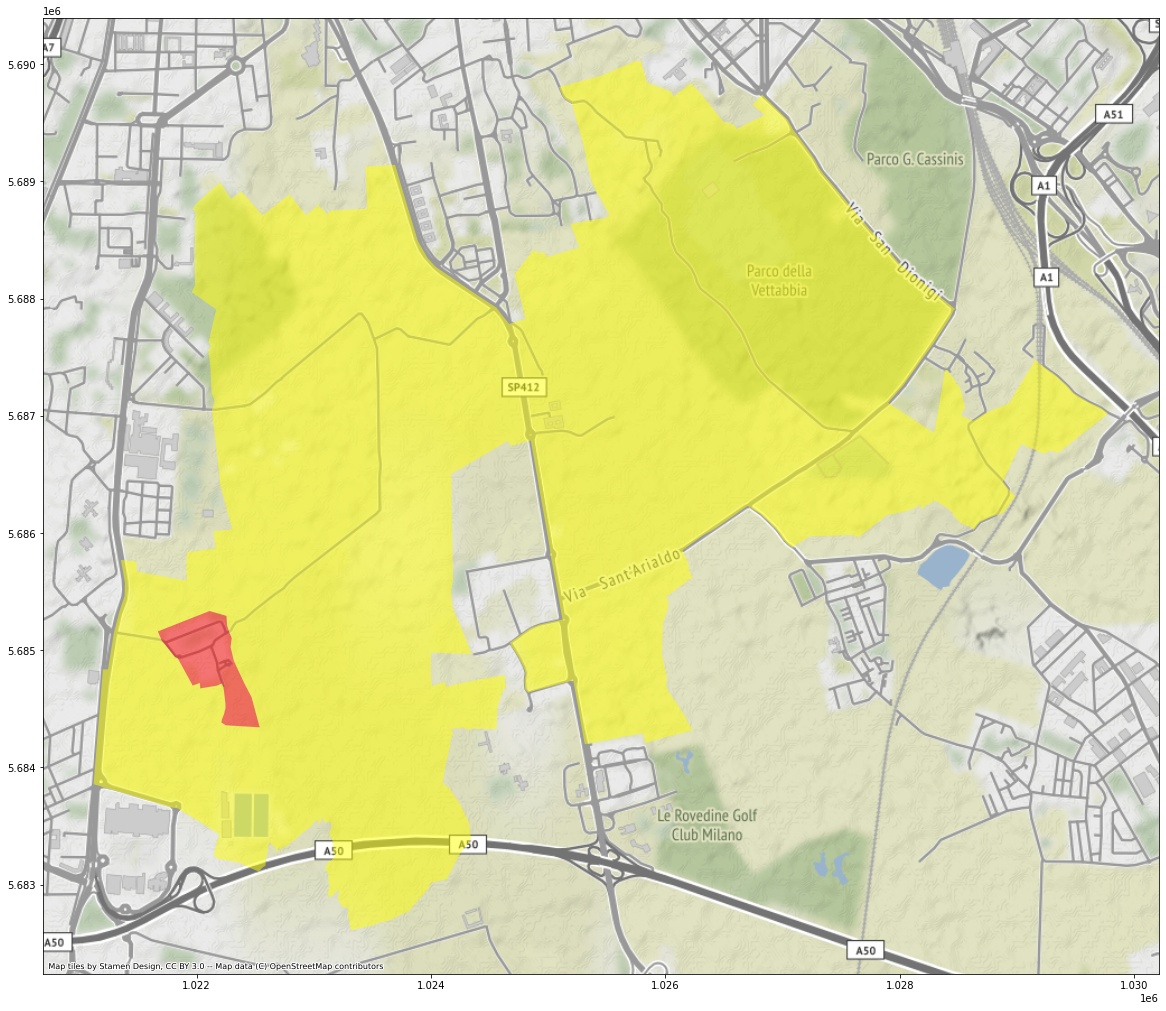

In [ ]:
# visualizzare i due quartieri sulla mappa di Milano con i colori indicati nella figura sotto
ax=Qt_piu.to_crs(3857).plot(facecolor='yellow',alpha=0.5,figsize=(20,20))
ax=Qt_meno.to_crs(3857).plot(ax=ax,facecolor='Red',alpha=0.5)
ctx.add_basemap(ax) #il quartiere piu grande e in giallo quello piu piccolo in rosso

In [ ]:
# salvare in un geodataframe le informazioni sul quartiere di Affori, prendendole dal geodataframe dei quartieri

In [ ]:
Affori = Qt_Milano[Qt_Milano['NIL'] == 'AFFORI']
Affori


ID_NIL     NIL  ... OBJECTID                                           geometry
69      80  AFFORI  ...      158  POLYGON ((9.17767 45.51899, 9.17796 45.51848, ...

[1 rows x 9 columns]

In [ ]:
# trovare le piste ciclabili che passano per il quartiere di Affori

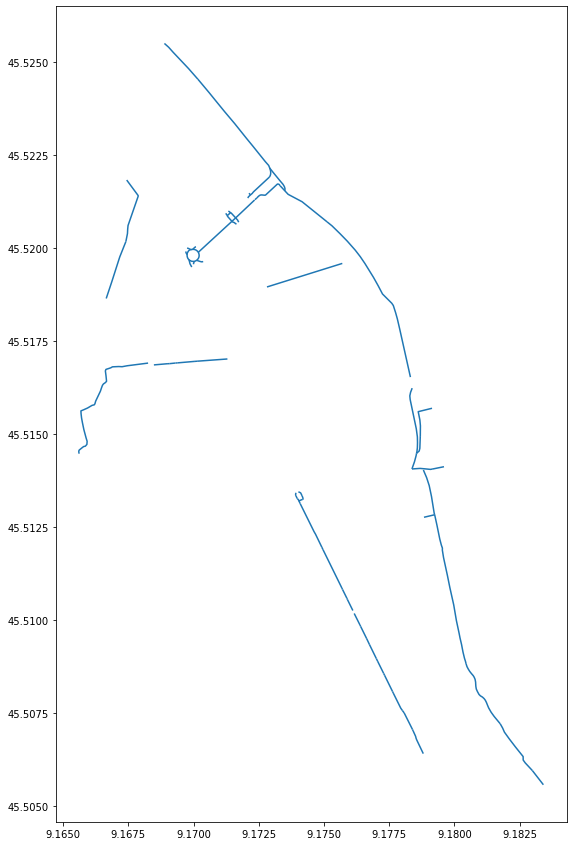

In [ ]:
CiclAffori = ciclabili[ciclabili.intersects(Affori.geometry.squeeze())]
CiclAffori.plot(figsize=(15,15))

In [ ]:
# visualizzare su una mappa il quartiere di Affori e le piste ciclabili che lo attraversano
# evidenziare bene in rosso le piste ciclabili come nell'esempio sotto

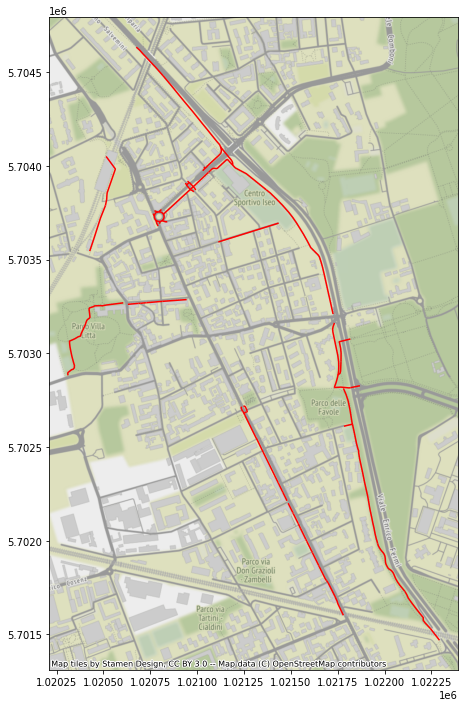

In [ ]:
ax = CiclAffori.to_crs(3857).plot(edgecolor='red',figsize=(20,12))
ctx.add_basemap(ax)